# Learning and Decision Making

## Laboratory 6: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The windy gridworld domain

Consider the larger version of the windy gridworld domain depicted in the figure below.

<img src="windy.png" width="400px">

In it, a boat must navigate a 7 &times; 10 gridworld, to reach the goal cell, marked with _G_. There is a crosswind upward through the middle of the grid, in the direction indicated by the gray arrows. The boat has available the standard four actions -- _Up_, _Down_, _Left_ and _Right_. In the region affected by the wind, however, the resulting next state is shifted upward as a consequence of the crosswind, the strength of which varies from column to column. The strength of the wind is given below each column, and corresponds to the number of cells that the movement is shifted upward. For example, if the boat is one cell to the right of the goal, then the action _Left_ takes you to the cell just above the goal.

The agent pays a cost of 1 in every step before reaching the goal. The problem can be described as an MDP $(\mathcal{X},\mathcal{A},\mathbf{P},c,\gamma)$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

np.set_printoptions(threshold=100)

# Problem specific parameters
WIND = (0, 0, 0, 1, 1, 1, 2, 2, 1, 0)
nrows = 7
ncols = 10
init = [3, 0]
goal = [3, 7]

# States
X = [[x, y] for x in range(nrows) for y in range(ncols)]
nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']
nA = len(A)

# Transition probabilities
P = dict()
P['U'] = np.zeros((nX, nX))
P['D'] = np.zeros((nX, nX))
P['L'] = np.zeros((nX, nX))
P['R'] = np.zeros((nX, nX))

for i in range(len(X)):
    x = X[i]
    y = dict()
    
    y['U'] = [x[0] - WIND[x[1]] - 1, x[1]]
    y['D'] = [x[0] - WIND[x[1]] + 1, x[1]]
    y['L'] = [x[0] - WIND[x[1]], x[1] - 1]
    y['R'] = [x[0] - WIND[x[1]], x[1] + 1]
    
    for k in y:
        y[k][0] = max(min(y[k][0], nrows - 1), 0)
        y[k][1] = max(min(y[k][1], ncols - 1), 0)
        j = X.index(y[k])
        P[k][i, j] = 1

c = np.ones((nX, nA))
c[X.index(goal), :] = 0

gamma = 0.99

# -- Pretty print

print('\n- MDP problem specification: -\n')

print('States:')
print(np.array(X))

print('\nActions:')
print(A)

print('\nTransition probabilities:')
for a in A:
    print('Action', a)
    print(P[a])
    
print('\ncost:')
print(c)

print('\nStart state:', init)
print('\nGoal state:', goal)


- MDP problem specification: -

States:
[[0 0]
 [0 1]
 [0 2]
 ..., 
 [6 7]
 [6 8]
 [6 9]]

Actions:
['U', 'D', 'L', 'R']

Transition probabilities:
Action U
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Action D
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
Action L
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
Action R
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

cost:
[[ 1.  1

---

#### Activity 1.        

Compute the optimal _Q_-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
J = np.zeros((70, 1))
Q = np.zeros((70,4))
err = 1

while err > 1e-8:
    Q_up = c[:,0:1] + gamma*P['U'].dot(J)
    Q_down = c[:,1:2] + gamma*P['D'].dot(J)
    Q_left = c[:,2:3] + gamma*P['L'].dot(J)
    Q_right = c[:,3:4] + gamma*P['R'].dot(J)
    Q_new = np.column_stack((Q_up, Q_down, Q_left, Q_right))
    J_new = np.min((Q_up, Q_down, Q_left, Q_right), axis=0)
    err = np.linalg.norm(Q_new-Q)
    J = J_new
    Q = Q_new

Q_optimal = Q
print(Q_optimal)

[[ 88.97864983  88.97864983  88.97864983  88.86732306]
 [ 88.86732306  88.86732306  88.97864983  88.75487178]
 [ 88.75487178  88.75487178  88.86732306  88.64128462]
 ..., 
 [ 87.18534608  87.44035769  88.29359262  87.31349262]
 [ 87.31349262  87.44035769  87.44035769  87.56595412]
 [ 87.56595412  87.56595412  87.44035769  87.56595412]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
# Q is a numpy matrix
# State is a list 

def select_action(Q, state, eps=0.1):
    Q_values = Q[X.index(state)]
    greedy_indexes = np.where(Q_values == min(Q_values))[0]
    greedy_action = A[np.random.choice(greedy_indexes)]
    return np.random.choice([greedy_action, np.random.choice(A)], p=[1-eps, eps])


### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for 100,000 iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the boat to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every 500 iterations of your method, where $Q^*$ is the optimal _Q_~function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 88.76077066  88.75858958  88.78648377  88.73130159]
 [ 88.70824563  88.71649448  88.69462384  88.62135745]
 [ 88.60962467  88.56917773  88.64912428  88.51938472]
 ..., 
 [ 87.02499645  87.05419585  87.61489108  87.08104278]
 [ 87.18647931  87.24860899  87.20009983  87.31078266]
 [ 87.36927645  87.32299146  87.31269483  87.32821186]]


<IPython.core.display.Javascript object>


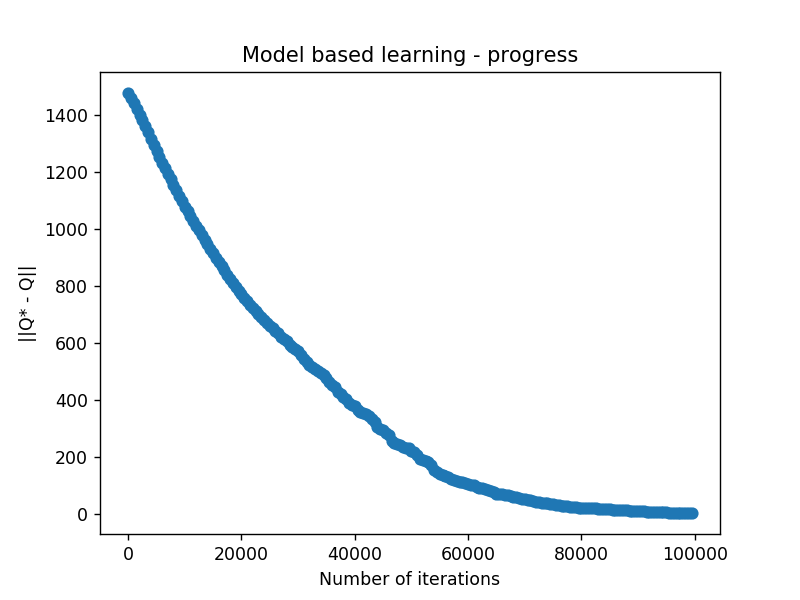

In [4]:
import matplotlib.pyplot as plt

# Initializing our probabilities matrix
P_rl = dict()
P_rl['U'] = np.eye(nX, nX)
P_rl['D'] = np.eye(nX, nX)
P_rl['L'] = np.eye(nX, nX)
P_rl['R'] = np.eye(nX, nX)

# Initializing our cost function
c_rl = np.zeros((nX, nA))

# Initializing our number of visits matrix
N = np.zeros((nX, nA))

# Initializing our Q matrix
Q_MB = np.zeros((nX, nA))

def I(x_next, y):
    if x_next == y:
        return 1
    return 0

def alpha(x, a):
    return 1/(N[x][a] + 1)

def probability_update(x, a, x_next):
    for y in range(len(X)):
        P_rl[a][x][y] = P_rl[a][x][y] + alpha(x,A.index(a))*(I(x_next, y) - P_rl[a][x][y])

def cost_update(x, a, c_t):
    c_rl[x][a] = c_rl[x][a] + alpha(x,a)*(c_t - c_rl[x][a])
    
def Q_update(x_t, a_t, c_t, x_next):
    soma = 0
    for y in range(len(X)):
        soma = soma + P_rl[A[a_t]][x_t][y] * np.amin(Q_MB[y])
    Q_MB[x_t][a_t] = c_rl[x_t][a_t] + gamma*soma # Note that c will already be updated
    
    
x_t = init # Start state

iterations_MB = []
norms_MB = []

for iteration in range(100000):
    a_t = select_action(Q_MB, x_t)
    N[X.index(x_t)][A.index(a_t)] += 1
    c_t = c[X.index(x_t)][A.index(a_t)]
    x_next = X[np.random.choice(range(len(X)), p=P[a_t][X.index(x_t)])]
    probability_update(X.index(x_t), a_t, X.index(x_next))
    cost_update(X.index(x_t), A.index(a_t), c_t)
    Q_update(X.index(x_t), A.index(a_t), c_t, X.index(x_next))
    if x_t == goal:
        x_next = X[np.random.choice(range(len(X)))]
    x_t = x_next
    if(iteration%500 == 0):
        iterations_MB += [iteration]
        norms_MB += [np.linalg.norm(Q_optimal - Q_MB)]

print(Q_MB)
plt.figure(1)
plt.scatter(iterations_MB, norms_MB)
plt.xlabel('Number of iterations')
plt.ylabel('||Q* - Q||')
plt.title("Model based learning - progress")
plt.show()

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the _Q_-learning algorithm with a learning rate $\alpha=0.3$.

---

<IPython.core.display.Javascript object>


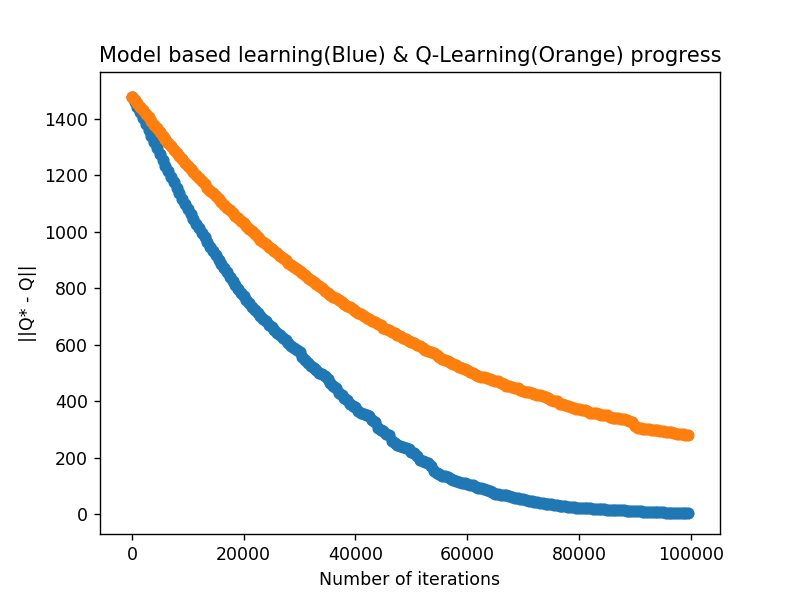

[[ 84.13808679  84.1605719   84.17517692  84.17394065]
 [ 84.20695644  84.18015023  84.19565822  84.2183288 ]
 [ 84.28487268  84.27526036  84.28644036  84.29563769]
 ..., 
 [ 43.54696173  41.63348032  37.72951583  47.03077944]
 [ 82.88141754  82.69938364  82.71362898  82.75982759]
 [ 82.87207159  82.86918546  82.87270847  82.90369505]]


In [5]:
Q_QL = np.zeros((nX, nA))

x_t = init
alpha = 0.3

iterations_QL = []
norms_QL = []

def Q_update(x_t, a_t, c_t, x_next):
    Q_QL[x_t][a_t] = Q_QL[x_t][a_t] + alpha*(c_t + gamma*np.amax(Q_QL[x_next]) - Q_QL[x_t][a_t])

for iteration in range(100000):
    a_t = select_action(Q_QL, x_t)
    c_t = c[X.index(x_t)][A.index(a_t)]
    x_next = X[np.random.choice(range(len(X)), p=P[a_t][X.index(x_t)])]
    Q_update(X.index(x_t), A.index(a_t), c_t, X.index(x_next))
    if x_t == goal:
        x_next = X[np.random.choice(range(len(X)))]
    x_t = x_next
    if(iteration%500 == 0):
        iterations_QL += [iteration]
        norms_QL += [np.linalg.norm(Q_optimal - Q_QL)]
    
plt.figure(2)
plt.scatter(iterations_MB, norms_MB)
plt.scatter(iterations_QL, norms_QL)
plt.xlabel('Number of iterations')
plt.ylabel('||Q* - Q||')
plt.title("Model based learning(Blue) & Q-Learning(Orange) progress")
plt.show()
    
print(Q_QL)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 69.02671409  69.01301589  68.95708259  69.01555982]
 [ 69.06001716  69.0372931   69.06172137  69.10265688]
 [ 69.19489334  69.17235482  69.21720859  69.27387892]
 ..., 
 [ 21.26424656  24.58809065  22.94187264  21.18283589]
 [ 67.50804173  67.27150594  67.30122596  67.3605198 ]
 [ 67.46100982  67.47558212  67.47308937  67.45499757]]


<IPython.core.display.Javascript object>


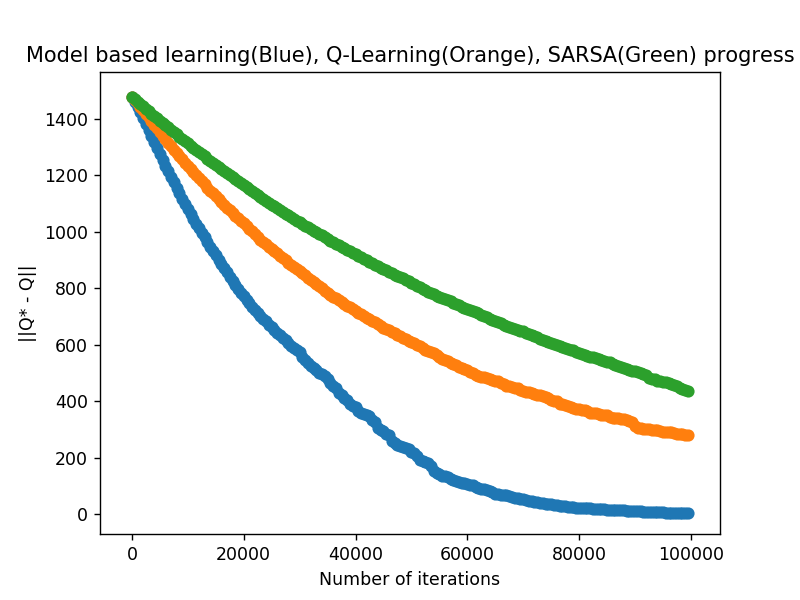

In [6]:
Q_SARSA = np.zeros((nX, nA))

x_t = init
alpha = 0.3

iterations_SARSA = []
norms_SARSA = []

def Q_update(x_t, a_t, c_t, x_next, a_next):
    Q_SARSA[x_t][a_t] = Q_SARSA[x_t][a_t] + alpha*(c_t + gamma*Q_SARSA[x_next][a_next] - Q_SARSA[x_t][a_t])

for iteration in range(100000):
    a_t = select_action(Q_SARSA, x_t)
    c_t = c[X.index(x_t)][A.index(a_t)]
    x_next = X[np.random.choice(range(len(X)), p=P[a_t][X.index(x_t)])]
    a_next = select_action(Q_SARSA, x_next)
    Q_update(X.index(x_t), A.index(a_t), c_t, X.index(x_next), A.index(a_next))
    if x_t == goal:
        x_next = X[np.random.choice(range(len(X)))]
    x_t = x_next
    if(iteration%500 == 0):
        iterations_SARSA += [iteration]
        norms_SARSA += [np.linalg.norm(Q_optimal - Q_SARSA)]
    
print(Q_SARSA)

plt.figure(3)
plt.scatter(iterations_MB, norms_MB)
plt.scatter(iterations_QL, norms_QL)
plt.scatter(iterations_SARSA, norms_SARSA)
plt.xlabel('Number of iterations')
plt.ylabel('||Q* - Q||')
plt.title("Model based learning(Blue), Q-Learning(Orange), SARSA(Green) progress")
plt.show()

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

-> 100.000 iterations were enough for the model based algorithm to converge, however, it's slower.

-> Q-Learning did not learn the model well enough in 100.000 iterations, although it was pretty close, and faster than Model-Based.

-> SARSA, although also faster than Model-Based, was very bad, because SARSA is an on-policy algorithm, which follows the policy it is learning. However, since the policy for our problem is not well defined, SARSA will behave poorly.